In [39]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

In [16]:
col_names=['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 
           'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 
           'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses','Class']

dataset = pd.read_csv('datasets/cancerdataraw.csv', names = col_names)
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [17]:
dataset.drop(['Sample code number'], axis = 1, inplace = True)
dataset.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [18]:
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [20]:
dataset.replace('?', np.nan, inplace=True)
dataset.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  683 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [21]:
from sklearn.impute import SimpleImputer

data = dataset.values

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')  # strategy: str, default=’mean’
imputedData = imputer.fit_transform(data)

In [23]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [ ]:
def check_nan(data):
    # Checking for NaN elements in a NumPy array returns True if the array contains any NaN elements and False otherwise
    array_sum = np.sum(data)
    array_has_nan = np.isnan(array_sum)
    return array_has_nan

In [ ]:
def get_data(normalise):
    data_in = np.genfromtxt('datasets/cancerdataraw.csv', delimiter=',')
    
    if check_nan(data_in):
        data_in = np.nan_to_num(data_in)
    
    data_inputx = data_in[:, 1:10]  # drop the first feature, 'Sample code number', irrelevant
    data_inputy = data_in[:, 10]    # or, data_inputy = data_in[:, -1]
        
    # Normalizing the features
    if normalise == True:
        transformer = Normalizer().fit(data_inputx)
        data_inputx = transformer.transform(data_inputx)
    
    np.savetxt("datasets/cancerdata_features.csv", data_inputx, delimiter=",")
        
    # One Hot Encoding the target
    df_inputy = pd.get_dummies(data_inputy)
    ohe_inputy = df_inputy.values
    np.savetxt("datasets/cancerdata_target.csv", ohe_inputy, delimiter=",")
    
    data_pro = np.hstack((data_inputx, ohe_inputy))
    np.savetxt("datasets/cancerdata_processed.csv", data_pro, delimiter=",")
    
    split_ratio = 0.4  # split train and test set by 60/40
    X_train, X_test, y_train, y_test = train_test_split(data_inputx, ohe_inputy, test_size=split_ratio, random_state=0)

    return X_train, X_test, y_train, y_test

In [54]:
data_in = np.genfromtxt('datasets/cancerdataraw.csv', delimiter=',')

In [55]:
data_in.shape

(699, 11)

In [56]:
# Checking for NaN elements in a NumPy array returns True if the array contains any NaN elements and False otherwise
array_sum = np.sum(data_in)
array_has_nan = np.isnan(array_sum)
print(array_has_nan)

True


In [46]:
array_has_nan

True

In [57]:
data_in = np.nan_to_num(data_in)

In [58]:
data_inputx = data_in[:,1:10]
data_inputx[:5,]

array([[ 5.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.],
       [ 5.,  4.,  4.,  5.,  7., 10.,  3.,  2.,  1.],
       [ 3.,  1.,  1.,  1.,  2.,  2.,  3.,  1.,  1.],
       [ 6.,  8.,  8.,  1.,  3.,  4.,  3.,  7.,  1.],
       [ 4.,  1.,  1.,  3.,  2.,  1.,  3.,  1.,  1.]])

In [59]:
transformer = Normalizer().fit(data_inputx)
data_inputx = transformer.transform(data_inputx)
data_inputx[:5,]

array([[0.75377836, 0.15075567, 0.15075567, 0.15075567, 0.30151134,
        0.15075567, 0.45226702, 0.15075567, 0.15075567],
       [0.31943828, 0.25555063, 0.25555063, 0.31943828, 0.4472136 ,
        0.63887656, 0.19166297, 0.12777531, 0.06388766],
       [0.53881591, 0.1796053 , 0.1796053 , 0.1796053 , 0.3592106 ,
        0.3592106 , 0.53881591, 0.1796053 , 0.1796053 ],
       [0.38023455, 0.5069794 , 0.5069794 , 0.06337243, 0.19011728,
        0.2534897 , 0.19011728, 0.44360698, 0.06337243],
       [0.60999428, 0.15249857, 0.15249857, 0.45749571, 0.30499714,
        0.15249857, 0.45749571, 0.15249857, 0.15249857]])

In [60]:
data_inputy = data_in[:,10]
data_inputy[:5]

array([2., 2., 2., 2., 2.])

In [61]:
df_inputy = pd.get_dummies(data_inputy)
df_inputy

,2.0,4.0
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
694,1,0
695,1,0
696,0,1
697,0,1


In [62]:
type(df_inputy)

pandas.core.frame.DataFrame

In [63]:
ohe_inputy = df_inputy.values
ohe_inputy

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [64]:
data_pro = np.hstack((data_inputx, ohe_inputy))
data_pro[:5,]

array([[0.75377836, 0.15075567, 0.15075567, 0.15075567, 0.30151134,
        0.15075567, 0.45226702, 0.15075567, 0.15075567, 1.        ,
        0.        ],
       [0.31943828, 0.25555063, 0.25555063, 0.31943828, 0.4472136 ,
        0.63887656, 0.19166297, 0.12777531, 0.06388766, 1.        ,
        0.        ],
       [0.53881591, 0.1796053 , 0.1796053 , 0.1796053 , 0.3592106 ,
        0.3592106 , 0.53881591, 0.1796053 , 0.1796053 , 1.        ,
        0.        ],
       [0.38023455, 0.5069794 , 0.5069794 , 0.06337243, 0.19011728,
        0.2534897 , 0.19011728, 0.44360698, 0.06337243, 1.        ,
        0.        ],
       [0.60999428, 0.15249857, 0.15249857, 0.45749571, 0.30499714,
        0.15249857, 0.45749571, 0.15249857, 0.15249857, 1.        ,
        0.        ]])

In [65]:
np.savetxt("datasets/cancerdata_features.csv", data_inputx, delimiter=",")
np.savetxt("datasets/cancerdata_target.csv", ohe_inputy, delimiter=",")
np.savetxt("datasets/cancerdata_processed.csv", data_pro, delimiter=",")

In [53]:
data_inputx.shape

(699, 9)

In [66]:
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier

In [67]:
def read_data(run_num, split_ratio):
    data_inputx = np.genfromtxt("datasets/cancerdata_features.csv", delimiter=",")
    data_inputy = np.genfromtxt("datasets/cancerdata_target.csv", delimiter=",")
    
    X_train, X_test, y_train, y_test = train_test_split(data_inputx, data_inputy, test_size=split_ratio, random_state=run_num)

    return X_train, X_test, y_train, y_test

In [ ]:
def scipy_nn(X_train, X_test, y_train, y_test, type_model, hidden, learn_rate, run_num):
    
    if type_model == 0:     # SGD
        # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
        nn = MLPClassifier(hidden_layer_sizes=(hidden,), random_state=run_num, max_iter=1000, solver='sgd', learning_rate_init=learn_rate)
        
    elif type_model == 1:   # Adam
        # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
        nn = MLPClassifier(hidden_layer_sizes=(hidden,), random_state=run_num, max_iter=1000, solver='adam', learning_rate_init=learn_rate)
        
    elif type_model == 2:   # SGD with 2 hidden layers
        # hidden_layer_sizes=(hidden,hidden, hidden) would implement 3 hidden layers
        nn = MLPClassifier(hidden_layer_sizes=(hidden, hidden), random_state=run_num, max_iter=1000, solver='sgd', learning_rate='constant', learning_rate_init=learn_rate)
        
    else:
        print('no model')    
 
    # Train the model using the training sets
    nn.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred_test = nn.predict(X_test)
    y_pred_train = nn.predict(X_train)

    #print([coef.shape for coef in nn.coefs_], 'weights shape')
 
    #print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
    
    acc_test = accuracy_score(y_pred_test, y_test) 
    acc_train = accuracy_score(y_pred_train, y_train) 

    cm = confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1)) 
    #print(cm, 'is confusion matrix')

    #auc = roc_auc_score(y_pred_test, y_test, average=None) 
    
    return acc_test #,acc_train

In [ ]:
def main(): 

    max_expruns = 5
    split_ratio = 0.4

    SGD_all = np.zeros(max_expruns) 
    Adam_all = np.zeros(max_expruns) 
    
    #SGD2_all = np.zeros(max_expruns)  
    max_hidden = 12

    learn_rate = 0.01
    #hidden = 8

    #for learn_rate in range(0.1, 1, 0.2):
    
    for hidden in range(6, max_hidden, 2):
 
        for run_num in range(0, max_expruns): 
    
            X_train, X_test, y_train, y_test = read_data(run_num, split_ratio)   
            
            acc_sgd = scipy_nn(x_train, x_test, y_train, y_test, 0, hidden, learn_rate, run_num)   # SGD
            acc_adam = scipy_nn(x_train, x_test, y_train, y_test, 1, hidden, learn_rate, run_num)  # Adam 
            
            #acc_sgd2 = scipy_nn(x_train, x_test, y_train, y_test, 2, hidden, learn_rate,  run_num)  # SGD2
           
            SGD_all[run_num] = acc_sgd
            Adam_all[run_num] = acc_adam

            #SGD2_all[run_num] = acc_sgd2   # two hidden layers
        
        print(SGD_all, hidden,' SGD_all\n')
        print(np.mean(SGD_all), hidden, ' mean SGD_all\n')
        print(np.std(SGD_all), hidden, ' std SGD_all\n')

        print(Adam_all, hidden,' Adam_all\n')
        print(np.mean(Adam_all), hidden, ' Adam _all\n')
        print(np.std(Adam_all), hidden, ' Adam _all')

        #print(SGD2_all, hidden,' SGD2_all')

    
    
if __name__ == '__main__':
     main() 

In [68]:
X_train, X_test, y_train, y_test = read_data(0, 0.4)

In [70]:
nn = MLPClassifier(hidden_layer_sizes=(12,), random_state=0, max_iter=1000, solver='sgd', learning_rate_init=0.1)

nn.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(12,), learning_rate_init=0.1, max_iter=1000,
              random_state=0, solver='sgd')

In [71]:
y_pred_test = nn.predict(X_test)
y_pred_train = nn.predict(X_train)

In [72]:
acc_test = accuracy_score(y_pred_test, y_test) 
acc_train = accuracy_score(y_pred_train, y_train) 
print([coef.shape for coef in nn.coefs_], 'weights shape')

[(9, 12), (12, 2)] weights shape


In [74]:
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_test))) 

RMSE: 0.33


In [77]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
print(cm, 'is confusion matrix')

[[169  11]
 [ 20  80]] is confusion matrix


In [79]:
y_pred_test

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0,

In [80]:
auc = roc_auc_score(y_pred_test, y_test, average=None) 
print(auc, 'is accuracy')

[0.88665039 0.88968548] is accuracy


In [81]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
def keras_nn(X_train, X_test, y_train, y_test, type_model, hidden, outputs, learn_rate, dropout_rate, weight_decay): 
    # https://keras.io/api/models/model_training_apis/
    
    if type_model == 0:   # SGD
        # Create the Sequential model
        model = Sequential([
            keras.layers.Dense(hidden, input_dim=X_train.shape[1], activation="relu"),
            keras.layers.Dense(outputs, activation='sigmoid')
        ])
        # Specify the loss function and the optimizer after a model is created
        model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])            
    
    elif type_model == 1:   # Adam
        # Create the Sequential model
        model = Sequential([
            keras.layers.Dense(hidden, input_dim=X_train.shape[1], activation="sigmoid"),
            keras.layers.Dense(outputs, activation='sigmoid')
        ])
        # Specify the loss function and the optimizer after a model is created
        #adam = Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
        model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])        

    elif type_model == 2:   # Adam with l2 regularisation &/ dropout
        # Create the Sequential model
        model = Sequential([
            keras.layers.Dense(hidden, input_dim=X_train.shape[1], activation="sigmoid", kernel_regularizer=keras.regularizers.l2(weight_decay)),
            keras.layers.Dropout(dropout_rate),
            keras.layers.Dense(outputs, activation='sigmoid')
        ])
        # Specify the loss function and the optimizer after a model is created
        #adam = Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
        model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])        
    
    else:
        print('no model')
    
    # Fit the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=10, verbose=0)
    #history = model.fit(X_train, y_train, validation_split=0.25, epochs=3000, batch_size=10, verbose=0)

    # Evaluate the model
    # https://keras.io/api/models/model_training_apis/
    _, acc_train = model.evaluate(X_train, y_train, verbose=0)
    _, acc_test = model.evaluate(X_test, y_test, verbose=0)
    #print('Train: %.3f, Test: %.3f' % (acc_train, acc_test))
    
    # Predit
    y_proba_test = model.predict(X_test)
    #y_pred_test = np.argmax(model.predict(X_test), axis=1)
    y_pred_test = np.argmax(y_proba_test, axis=1)
    y_test_arg = np.argmax(y_test, axis=1)
    acc = accuracy_score(y_test_arg, y_pred_test)
    
    if type_model == 0:
        fig_name = "SGD"
    elif type_model == 1:
        fig_name = "Adam"
    elif type_model == 2 and dropout_rate == 0 and weight_decay != 0:
        fig_name = "Adam_L2"
    elif type_model == 2 and dropout_rate != 0 and weight_decay == 0:
        fig_name = "Adam_dropout"
    elif type_model == 2 and dropout_rate == 0.1 and weight_decay == 0.01:
        fig_name = "Adam_hybrid_1"
    elif type_model == 2 and dropout_rate == 0.25 and weight_decay == 0.01:
        fig_name = "Adam_hybrid_2"
    elif type_model == 2 and dropout_rate == 0.5 and weight_decay == 0.02:
        fig_name = "Adam_hybrid_3"
    else:
        pass

    # Plot history
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title(fig_name+'_Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.savefig("figures/"+fig_name+'_auc_roc.png')
    plt.show()
    plt.clf()
    
    return acc

In [84]:
# Create the Sequential model
model = Sequential([
    keras.layers.Dense(12, input_dim=X_train.shape[1], activation="relu"),
    keras.layers.Dense(2, activation='sigmoid')
])

# Specify the loss function and the optimizer after a model is created
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=10, verbose=0)

In [86]:
# Evaluate the model
# https://keras.io/api/models/model_training_apis/
_, acc_train = model.evaluate(X_train, y_train, verbose=0)
_, acc_test = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (acc_train, acc_test))

Train: 0.916, Test: 0.886


In [88]:
# Predit
y_proba_test = model.predict(X_test)
#y_pred_test = np.argmax(model.predict(X_test), axis=1)
y_pred_test = np.argmax(y_proba_test, axis=1)
y_test_arg = np.argmax(y_test, axis=1)
acc = accuracy_score(y_test_arg, y_pred_test)

In [89]:
acc

0.8857142857142857

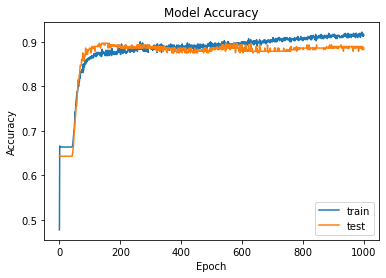

<Figure size 432x288 with 0 Axes>

In [90]:
# Plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()
plt.clf()